# convert pleco dump to spreadsheet

In [1]:
#import xml file
import xml.etree.ElementTree as ET
import csv
tree = ET.parse('./Report.xml')
root = tree.getroot()
card_data = []
for card in root.findall(".//card"):
    card_datum = {}
    card_datum["created_stamp"] = card.get("created")
    card_datum["modified_stamp"] = card.get("modified")
    
    entry = card.find("./entry")
    card_datum["traditional"] = entry.find("./headword[@charset='tc']").text

    if entry.find("./cantopron") is None:
        continue
    card_datum["jyutping"] = entry.find("./cantopron").text
    
    if card.find("scoreinfo") is None:
        continue
    card_datum["correct"] = int(card.find("scoreinfo").get("correct"))
    card_datum["incorrect"] = int(card.find("scoreinfo").get("incorrect"))
    card_datum["difficulty"] = int(card.find("scoreinfo").get("difficulty"))
    card_datum["priority"] = card.find("scoreinfo").get("priority")
    card_datum["last_reviewed_stamp"] = int(card.find("scoreinfo").get("lastreviewedtime"))
    card_data.append(card_datum)
    
    

    
    
#convert xml to csv
import pandas as pd
cards_frame = pd.DataFrame(card_data)
for stamp in ["last_reviewed_stamp","created_stamp","modified_stamp"]:
    cards_frame[stamp] = pd.to_datetime(cards_frame[stamp],unit='s').dt.round('1d')
    
cards_frame.sort_values("created_stamp", ascending=False,inplace=True)
cards_frame.to_csv('./Report.csv', index = False)


# View 30 Most Recently Added Vocabs

In [2]:
#30 most recently added
cards_frame.sort_values("created_stamp", ascending=False).head(30)

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
859,2021-08-15,2021-08-15,文字,man4 zi6,0,1,90,None,2021-08-18
857,2021-08-15,2021-08-15,朝鮮,ciu4 sin1,0,1,90,None,2021-08-15
858,2021-08-15,2021-08-15,老闆,lou5 baan2,0,1,90,None,2021-08-15
856,2021-08-05,2021-08-05,得唔得?,dak1 m4 dak1,2,0,100,None,2021-08-09
851,2021-08-04,2021-08-05,情侶,cing4 leoi5,0,2,90,None,2021-08-09
848,2021-08-04,2021-08-05,金色,gam1 sik1,2,0,100,None,2021-08-09
849,2021-08-04,2021-08-05,出去,ceot1 heoi3,1,1,90,None,2021-08-07
850,2021-08-04,2021-08-05,金髮,gam1 faat3,2,0,100,None,2021-08-09
855,2021-08-04,2021-08-05,約會,joek3 wui6,0,1,90,None,2021-08-09
852,2021-08-04,2021-08-05,仲係,zung6 hai6,1,1,90,None,2021-08-09


# View 30 Most Recently Reviewed Vocabs

In [3]:
#30 most recently reviewed
cards_frame.sort_values("last_reviewed_stamp", ascending=False).head(30)

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
859,2021-08-15,2021-08-15,文字,man4 zi6,0,1,90,None,2021-08-18
847,2021-07-14,2021-08-15,準備,zeon2 bei6,0,1,90,None,2021-08-18
547,2020-11-04,2021-08-15,晏晝飯,aan3 zau3 faan6,0,1,90,None,2021-08-18
517,2020-10-28,2021-08-15,塞,sak1,0,1,90,None,2021-08-18
560,2020-11-18,2021-08-15,青蘋果,ceng1 ping4 gwo2,0,1,90,None,2021-08-18
553,2020-11-05,2021-08-15,雨傘,jyu5 saan3,0,1,90,None,2021-08-18
253,2020-05-05,2021-07-24,貴,gwai3,12,12,50,None,2021-08-15
376,2020-06-12,2021-07-24,手提電腦,sau2 tai4 din6 nou5,5,8,70,None,2021-08-15
145,2020-04-09,2021-07-24,運動,wan6 dung6,5,18,70,None,2021-08-15
546,2020-11-04,2021-07-24,一齊,jat1 cai4,1,5,90,veryhigh,2021-08-15


# View 30 Random Vocabs

In [4]:
#30 random words
cards_frame.sample(frac=1).head(30)

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
627,2021-01-07,2021-07-24,多數,do1 sou3,1,2,78,None,2021-04-29
452,2020-08-04,2021-07-24,禮拜五,lai5 baai3 ng5,6,2,80,None,2021-04-14
319,2020-06-01,2021-07-24,雲,wan4,5,13,70,None,2021-08-14
148,2020-04-09,2021-07-24,游水,jau4 seoi2,7,21,50,None,2021-06-03
559,2020-11-18,2021-07-24,介紹,gaai3 siu6,1,11,80,veryhigh,2021-08-15
796,2021-04-27,2021-07-24,下次見,haa6 ci3 gin3,2,0,100,None,2021-05-23
122,2020-04-05,2021-07-24,茶,caa4,11,3,112,None,2020-09-30
596,2020-12-24,2021-07-24,慢,maan6,2,3,80,None,2021-05-28
94,2020-03-26,2021-07-24,狗,gau2,11,2,104,None,2021-08-14
497,2020-10-01,2021-08-04,報紙,bou3 zi2,0,4,90,None,2021-08-09


# Cell Reserved for Searching

In [5]:
cards_frame[cards_frame.traditional.str.contains('朝')]

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
857,2021-08-15,2021-08-15,朝鮮,ciu4 sin1,0,1,90,None,2021-08-15
696,2021-02-10,2021-07-24,今朝,gam1 ziu1,2,0,100,None,2021-03-17
562,2020-11-18,2021-08-15,朝早,ziu1 zou2,0,1,92,None,2021-08-15


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
DatetimeIndex(['2021-08-12', '2021-08-13', '2021-08-14', '2021-08-15',
               '2021-08-16', '2021-08-17', '2021-08-18'],
              dtype='datetime64[ns]', freq='D')


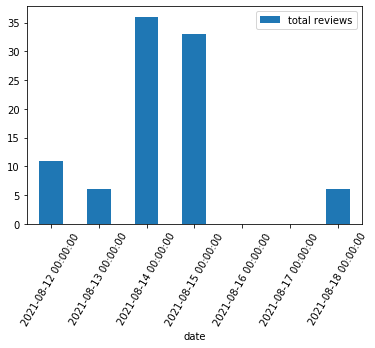

In [6]:
import datetime



today = pd.to_datetime("today").round('1d')
print(type(today))
week_range = pd.date_range(today-pd.Timedelta(days=6),today,freq='d')
print(week_range)
date2count ={"date":week_range,"total reviews":[0]*7}
for card_stamp in cards_frame["last_reviewed_stamp"]:
    if card_stamp in week_range:
        if card_stamp in date2count["date"]:
            date2count["total reviews"][list(week_range).index(card_stamp)] += 1
            

datesframe = pd.DataFrame(date2count)
datesframe.plot.bar(x='date', y='total reviews', rot=60)
